# Modèles de mélange gaussiens

## Estimation à partir de données générées

Une première utilisation sur des données unidimensionnelles similaires à celles employées pour l’estimation par noyaux

Converged? True, log-vraisemblance : -2.022312582317855


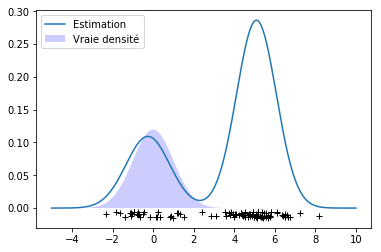

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Générer l'échantillon
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), 
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# Préparer les données où on calculera la densité
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_density = (0.3 * norm(0, 1).pdf(X_plot[:, 0] + 0.7 * norm(5, 1).pdf(X_plot[:, 0])))

gmm = GaussianMixture(n_components=2,n_init=3).fit(X)
print("Converged? {}, log-vraisemblance : {}".format(gmm.converged_, gmm.lower_bound_))


# calcul de la densité pour les données de X_plot
density = np.exp(gmm.score_samples(X_plot))

# affichage : vraie densité et estimation
fig, ax = plt.subplots()
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

# Question  → Compte-rendu

Faites varier le nombre de composantes et examinez visuellement les résultats. Regardez les pondérations des composantes et les moyennes de ces composantes. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.
    
    Plus le nombre de composantes augmente, plus le log-vraisemblance diminue

Converged? True, log-vraisemblance : -2.3908311694686644
Pondérations: [ 1.], Moyennes : [[ 3.5076501]]
Converged? True, log-vraisemblance : -2.022312582317855
Pondérations: [ 0.70397996  0.29602004], Moyennes : [[ 5.09105427]
 [-0.25792193]]
Converged? True, log-vraisemblance : -2.002406928584515
Pondérations: [ 0.2024339   0.70834469  0.08922141], Moyennes : [[-0.8588096 ]
 [ 5.07541833]
 [ 0.96789179]]
Converged? True, log-vraisemblance : -2.0169753332122524
Pondérations: [ 0.19038776  0.43078665  0.11083259  0.267993  ], Moyennes : [[-0.9078809 ]
 [ 4.77745629]
 [ 0.98679927]
 [ 5.64591467]]
Converged? True, log-vraisemblance : -1.9978314548162388
Pondérations: [ 0.34517056  0.10798717  0.23362536  0.12771588  0.18550104], Moyennes : [[ 5.198694  ]
 [ 0.86104713]
 [ 4.1748845 ]
 [ 6.42921139]
 [-0.95007181]]
Converged? True, log-vraisemblance : -1.9559097380254533
Pondérations: [ 0.18414256  0.33674347  0.06970889  0.14100208  0.23242157  0.03598144], Moyennes : [[-0.97541083]
 [ 5

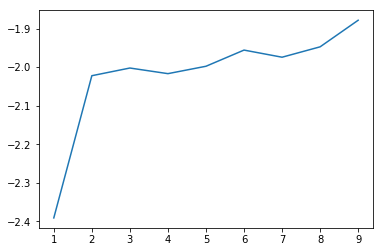

Converged? True, log-vraisemblance : -1.984762271297305


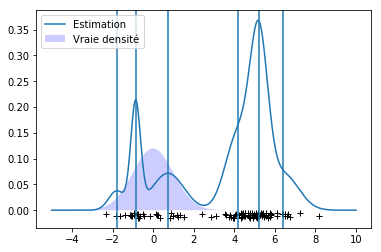

[ 0.03680387  0.348614    0.14109626  0.22205405  0.12973236  0.12169945]


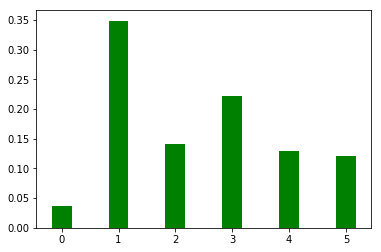

In [2]:
lower_bounds = []

for i in range(1, 10):
    gmm = GaussianMixture(n_components=i,n_init=3).fit(X)
    print("Converged? {}, log-vraisemblance : {}".format(gmm.converged_, gmm.lower_bound_))
    print("Pondérations: {}, Moyennes : {}".format(gmm.weights_, gmm.means_))
    lower_bounds.append(gmm.lower_bound_)


plt.plot(range(1, 10), lower_bounds,  '-', label="Evolution du log-vraisemblance en fonction du nombre de composantes")
plt.show()

gmm = GaussianMixture(n_components=6,n_init=3).fit(X)
print("Converged? {}, log-vraisemblance : {}".format(gmm.converged_, gmm.lower_bound_))

# calcul de la densité pour les données de X_plot
density = np.exp(gmm.score_samples(X_plot))

# affichage : vraie densité et estimation
fig, ax = plt.subplots()
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
for mean in gmm.means_:
    ax.axvline(x=mean)
ax.legend(loc='upper left')
plt.show()

print(gmm.weights_)
plt.bar(np.arange(6), gmm.weights_, 0.35, color='g')
plt.show()

Une utilisation sur des données bidimensionnelles :

Converged? True, log-vraisemblance : -4.295525254967237


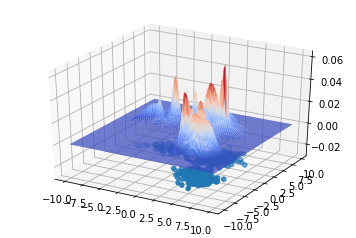

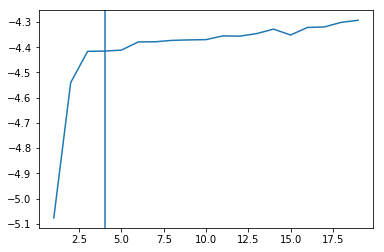

In [3]:
# générer l'échantillon
md1 = 1.5 * np.random.randn(200,2) + [3,3]
md2 = np.random.randn(100,2).dot([[2, 0],[0, 0.8]]) + [-3, 3]
md3 = np.random.randn(100,2) + [3, -3]
md4 = np.random.randn(100,2) + [5, -5]
md = np.concatenate((md1, md2, md3, md4))

# préparer les données où on calculera la densité
grid_size = 100
Gx = np.arange(-10, 10, 20/grid_size)
Gy = np.arange(-10, 10, 20/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# estimation par mélange gaussien
gmm = GaussianMixture(n_components=20,n_init=3).fit(md)
print("Converged? {}, log-vraisemblance : {}".format(gmm.converged_, gmm.lower_bound_))

# calcul de la densité pour les données de la grille
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage : données et estimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(md[:,0], md[:,1], -0.025)
plt.show()

lower_bounds = []
nb = 20
for i in range(1, nb):
    gmm = GaussianMixture(n_components=i,n_init=3).fit(md)
    lower_bounds.append(gmm.lower_bound_)

plt.plot(range(1, nb), lower_bounds,  '-', label="Evolution du log-vraisemblance en fonction du nombre de composantes")
plt.axvline(x=4)
plt.show()

# Question

Faites varier le nombre de composantes et examinez visuellement les résultats. Examinez de quelle manière évolue la valeur finale atteinte par la log-vraisemblance avec le nombre de composantes.

    Plus le nombre de composantes est élevé, moins la densité est "lisse"
    De même, la log-vraisemblance décroit rapidement puis plus faiblement

# Question

Générez des données bidimensionnelles suivant une distribution uniforme dans [0,1]2
et estimez un mélange gaussien avec 3 composantes. Visualisez les résultats. 

Utilisez la méthode predict de GaussianMixture pour obtenir des étiquettes de groupe pour les données. Appliquez plusieurs fois de suite la modélisation suivie d’affectation d’étiquettes de groupe et examinez la stabilité des partitionnements en utilisant l’indice de Rand ajusté, comme dans les TP de classification automatique. Que constatez-vous ?

    On observe une forte variance dans l'indice de rand, indiquant que le résultat
    dépend beaucoup de l'initialisation des composantes

(100, 100)
(100, 100)


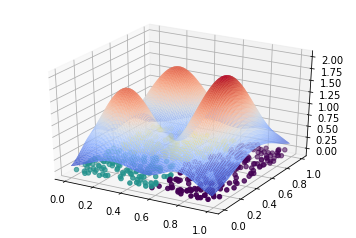

In [4]:
# générer l'échantillon
d = np.random.uniform(0, 1, (500, 2))
gmm = GaussianMixture(n_components=3,n_init=3).fit(d)

labels = gmm.predict(d)

# GRID MESH
grid_size = 100
Gx = np.arange(0, 1, 1/grid_size)
Gy = np.arange(0, 1, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
print(Gx.shape)
print(Gy.shape)
NBP = 10000

# calcul de la densité pour les données de la grille
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(NBP))[:,np.newaxis],
        (Gy.reshape(NBP)[:,np.newaxis])))))

# affichage : données et estimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(100, 100), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(d[:,0], d[:,1], -0.025, c=labels )
plt.show()

Indice de rand

In [7]:
def stability(z):
    max_k = len(z)
    r = [] 
    for i in range(0, max_k):
        for j in range(i + 1, max_k - 1):
            r.append(metrics.adjusted_rand_score(z[i], z[j]))
    return np.asarray(r)

from sklearn import metrics

max_k = 30
z = []
for k in range(0, max_k):
    gmm = GaussianMixture(n_components=3,n_init=3).fit(d)
    z.append(gmm.predict(d))

    
r = stability(z)

from scipy import stats
print("MEAN = {}".format(r.mean()))
print("STD = {}".format(r.std()))

MEAN = 0.6072722432515877
STD = 0.2850713199778439


# Choix du nombre de composantes et du type de matrice de covariances pour les données générées

Pour choisir le nombre de composantes du mélange, nous comparerons d’abord les critères AIC et BIC en utilisant des matrices de covariance 'full' (par défaut). Sur les données bidimensionnelles générées :

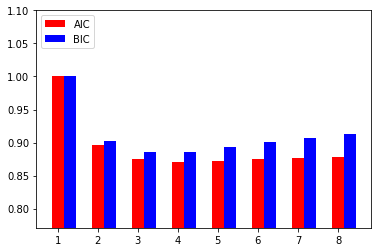

In [8]:
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []

# construction des modèles et calcul des critères
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))


# normalisation des résultats obtenus pour les critères
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

# affichage
xpos = np.arange(n_max)+1  # localisation des barres
largeur = 0.3              # largeur des barres
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

# Question : Compte-rendu
Réalisez la même comparaison pour ces données avec des matrices de covariances 'diag'

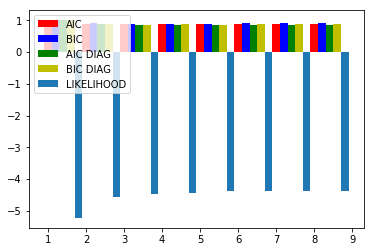

In [10]:
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
aic_diag = []
bic_diag = []
likelihoods = []

# construction des modèles et calcul des critères
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, covariance_type='diag').fit(md)
    aic_diag.append(gmm.aic(md))
    bic_diag.append(gmm.bic(md))
    likelihoods.append(gmm.lower_bound_)

# normalisation des résultats obtenus pour les critères
raic_diag = aic_diag/np.max(aic_diag)
rbic_diag = bic_diag/np.max(bic_diag)

# affichage
xpos = np.arange(n_max)+1  # localisation des barres
largeur = 0.2            # largeur des barres
#plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.bar(xpos+2*largeur, raic_diag, largeur, color='g', label="AIC DIAG")
plt.bar(xpos+3*largeur, rbic_diag, largeur, color='y', label="BIC DIAG")
plt.bar(xpos+4*largeur, likelihoods, largeur, label="LIKELIHOOD")
plt.legend(loc='upper left')
plt.show()

# Estimation à partir des données « textures »

Nous appliquerons l’estimation de densité par mélange gaussien aux données « textures » projetées sur les deux premiers axes principaux.

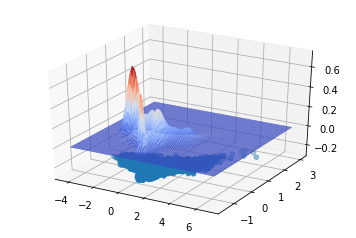

In [17]:
# lecture des données et aplication de l'ACP
from sklearn.decomposition import PCA
textures = np.loadtxt('texture.dat')
pca = PCA(n_components=2).fit(textures[:,:40])
texturesp = pca.transform(textures[:,:40])

# construction du modèle de mélange, vérifications
gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesp[:,:2])

# préparer les données où on calculera la densité
grid_size = 100
xmin = 1.3*np.min(texturesp[:,0])
xmax = 1.3*np.max(texturesp[:,0])
Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ymin = 1.3*np.min(texturesp[:,1])
ymax = 1.3*np.max(texturesp[:,1])
Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# calcul de la densité pour les données de la grille
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage des résultats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.25)
plt.show()

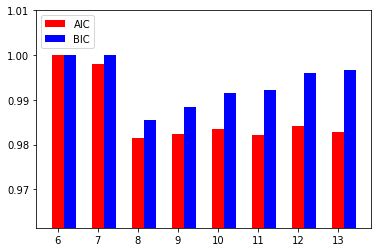

In [18]:
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+6
aic = []
bic = []

# construction des modèles et calcul des critères
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(texturesp[:,:2])
    aic.append(gmm.aic(texturesp[:,:2]))
    bic.append(gmm.bic(texturesp[:,:2]))

# normalisation des résultats obtenus pour les critères
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

# affichage
xpos = n_components_range  # localisation des barres
largeur = 0.3              # largeur des barres
plt.ylim([min(np.concatenate((rbic,raic)))-0.02, 1.01])
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

# Question

Appliquez l’estimation de densité par mélange gaussien sur les données « textures » projetées sur les deux premiers axes discriminants.

[  2.   2.   2. ...,  14.  14.  14.]


/home/yvan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


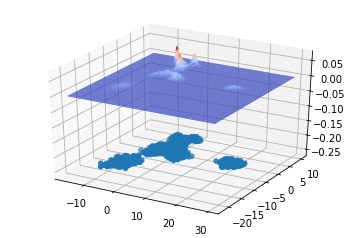

In [15]:
# lecture des données et aplication de l'ACP
lcls = textures[:,40]
print(lcls)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2).fit(textures[:,:40], lcls)
texturesp = lda.transform(textures[:,:40])

# construction du modèle de mélange, vérifications
gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesp[:,:2])

# préparer les données où on calculera la densité
grid_size = 100
xmin = 1.3*np.min(texturesp[:,0])
xmax = 1.3*np.max(texturesp[:,0])
Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ymin = 1.3*np.min(texturesp[:,1])
ymax = 1.3*np.max(texturesp[:,1])
Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# calcul de la densité pour les données de la grille
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# affichage des résultats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.25)
plt.show()

# Choix du nombre de composantes et du type de matrice de covariances pour les données « textures »

Déterminons d’abord le meilleur nombre de composantes en utilisant les critères AIC et BIC pour les projections de ces données sur les deux premiers axes principaux :

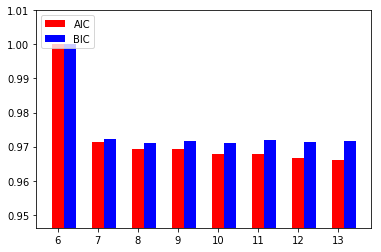

In [16]:
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+6
aic = []
bic = []

# construction des modèles et calcul des critères
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(texturesp[:,:2])
    aic.append(gmm.aic(texturesp[:,:2]))
    bic.append(gmm.bic(texturesp[:,:2]))

# normalisation des résultats obtenus pour les critères
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

# affichage
xpos = n_components_range  # localisation des barres
largeur = 0.3              # largeur des barres
plt.ylim([min(np.concatenate((rbic,raic)))-0.02, 1.01])
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

# Question  : Compte-rendu
Comment expliquez-vous que la valeur optimale obtenue avec BIC pour n_components soit inférieure au nombre de classes de textures ?

    Le nombre de classes est de 11
    Cela indique que certaines classes peuvent être regroupées
    

# Question : Compte-rendu
Réalisez la même étude en utilisant plutôt les projections des données « textures » sur les deux premiers axes discriminants. Comment expliquez-vous la différence par rapport au cas précédent ?